In [6]:
data = pd.read_csv('Data_July_raw.csv')
data.time = pd.to_datetime(data.time, format = "%d/%m/%Y %H.%M.%S")
data.index = data.time
data = data.loc["2020-07-12 07:00:00":"2020-07-24 07:00:00"]
# data = data.drop(data.index[range(24)]) # drop extreme outliers
# data1 = pd.read_csv('cleaned_glucose1.csv')
# data.time = pd.to_datetime(data.time)
# data.index = data.time
# data1.time = pd.to_datetime(data1.time)
# data1.index = data1.time
data.head()
# data1.head()

,time,glucose level
time,,
2020-07-12 07:09:30,2020-07-12 07:09:30,105
2020-07-12 07:24:30,2020-07-12 07:24:30,101
2020-07-12 07:29:30,2020-07-12 07:29:30,102
2020-07-12 07:30:30,2020-07-12 07:30:30,102
2020-07-12 07:31:30,2020-07-12 07:31:30,102


In [7]:
# before interpolation
data['day'] = [d.day for d in data.time]
data['hour'] = [d.hour for d in data.time]
# data

In [9]:
# data1['day'] = [d.day for d in data1.time]
# data1['hour'] = [d.hour for d in data1.time]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
# from statsmodels.graphics import tsaplots
from scipy import fft, ifft

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
# from statsmodels.graphics import tsaplots
from scipy import fft, ifft


In [11]:
# data1['glucose level'].var()

In [12]:
# data1['glucose level'].std() / data1['glucose level'].mean()

In [13]:
data['glucose level'].mean()

119.30823463056966

In [14]:
data['glucose level'].var()

242.01526080360716

In [15]:
data['glucose level'].std() / data['glucose level'].mean()

0.1303920029271029

In [9]:
date_temp = data
data.index = data.time

In [10]:
# check gaps
gap_data10 = pd.read_csv('Data_July_raw.csv')
gap_data10 = pd.to_datetime(gap_data10.time, format = "%d/%m/%Y %H.%M.%S")
gap_data = pd.DataFrame(data=gap_data10, index = range(len(gap_data10)))
gap_data.index = gap_data.time
# gap_data.time = pd.to_datetime(gap_data.time)
# gap_data.index = range(len(gap_data))
# gap_data.index

In [26]:
times1 = gap_data.index
# times1
# data['diff_minutes'] = data['End_date'] - data['Start_date']
# df['diff_minutes']=df['diff_minutes']/np.timedelta64(1,'m')

def gap_num(data_time_index, gap_time):
    """ Check how many gaps there are in times, where gap distance is greater than gap_time"""
    flag = 0
    for i in range(len(data_time_index)-1):
        if (data_time_index[i+1] - data_time_index[i])/np.timedelta64(1,'m') > gap_time:
            flag += 1
    return flag

print("number of gaps greater than 1 min =", gap_num(times1, 2.0), 
      ", number of gaps greater than 15 mins =", gap_num(times1, 15.0), 
      ", number of gaps greater than 30 mins =", gap_num(times1, 30.0), 
      ", number of gaps greater than 1 hour =", gap_num(times1, 60.0), 
      ", number of gaps greater than 1.5 hours =", gap_num(times1, 90.0), 
      ", number of gaps greater than 2 hours =", gap_num(times1, 120.0), 
      ", number of gaps greater than 4 hours =", gap_num(times1, 240.0))

number of gaps greater than 1 min = 1084 , number of gaps greater than 15 mins = 11 , number of gaps greater than 30 mins = 10 , number of gaps greater than 1 hour = 4 , number of gaps greater than 1.5 hours = 2 , number of gaps greater than 2 hours = 1 , number of gaps greater than 4 hours = 1


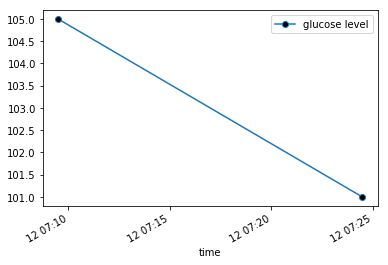

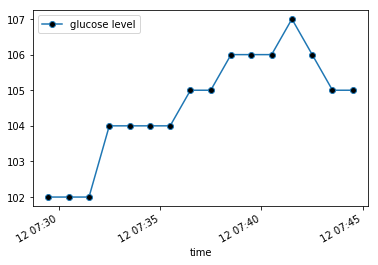

In [27]:
two_data = data.loc[:"2020-07-12 07:24:30"].drop(columns=["time", "day", "hour"])
new_two_data = data.loc[:"2020-07-12 07:24:30"].drop(columns=["time", "day", "hour"])
new_two_data['mins'] = [1, 15]
two_data.plot(style='.-', marker='o', markerfacecolor='black')
fifteen_data = data.loc["2020-07-12 07:29:30":"2020-07-12 07:45:30"].drop(columns=["time", "day", "hour"])
fifteen_data.plot(style='.-', marker='o', markerfacecolor='black')

# two_data.values
# data
# fifteen_data

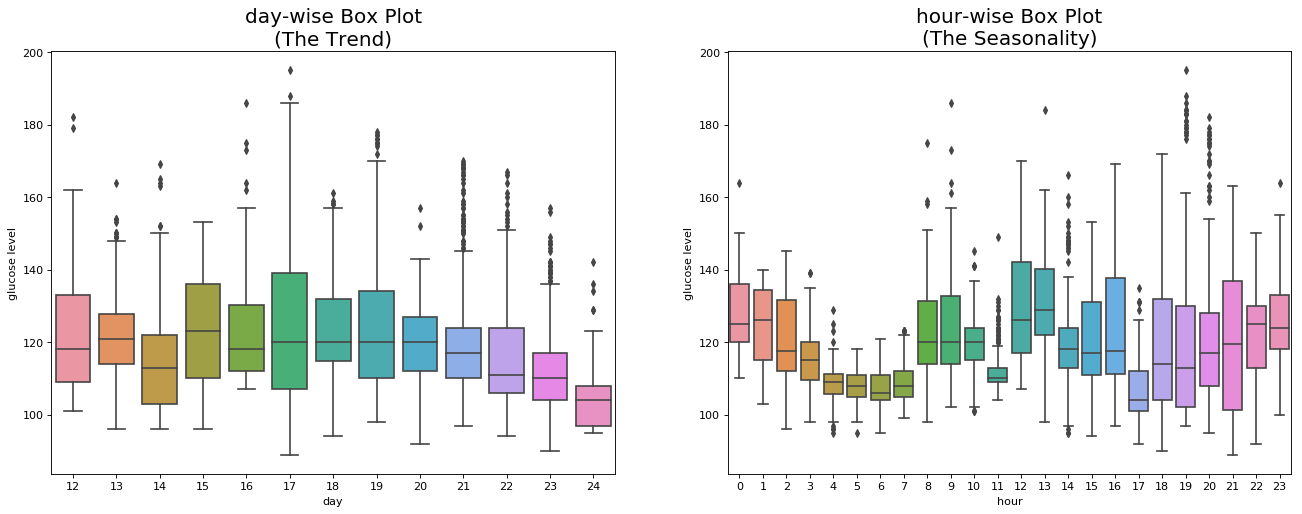

In [65]:
df = data
days = df['day'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(days), replace=False)

# Draw Plot
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day', y='glucose level', data=df, ax=axes[0])
sns.boxplot(x='hour', y='glucose level', data=df,ax =axes[1])

# Set Title
axes[0].set_title('day-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [66]:
# parital auto-correlation
# from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(data['glucose level'], lags=24)
# plt.show()

In [11]:
# Interpolating
data.index = data.time
data.index = data['glucose level'].index - pd.DateOffset(seconds=30)

In [12]:
# July data
data_int = data['glucose level'].resample('1T').asfreq()
data_int = data_int.interpolate(method='linear', order=3)
# data_int.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')

Text(0, 0.5, 'glucose level (mg/dL)')

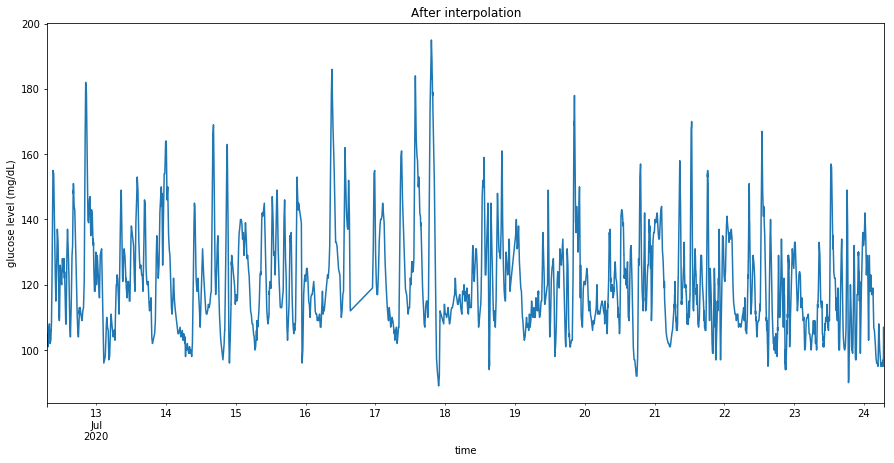

In [30]:
data_int.plot(figsize=(15,7))
plt.title("After interpolation"); plt.ylabel("glucose level (mg/dL)")

Text(0, 0.5, 'glucose level (mg/dL)')

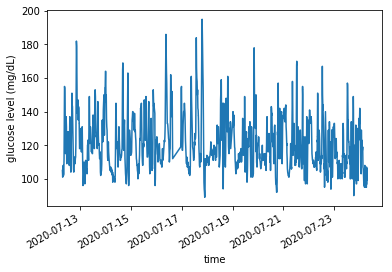

In [31]:
data['glucose level'].plot(); plt.ylabel("glucose level (mg/dL)")

In [13]:
# calculate mean, var stuff after interpolation

# fix index for interpolated data
new_dates = data_int.keys()
new_data = pd.DataFrame(data_int, index = new_dates, columns=["time", 'glucose level'])

# i=0
# for row in new_dates:
#     if i != len(data_int):
#         new_data["glucose level"][i] = data_int[row]
#         i += 1

# new_data.time = pd.to_datetime(data_int.keys(), format = "%d/%m/%Y %H.%M.%S")
# new_data["time"]

In [35]:
new_data["glucose level"].mean()

120.81020207283886

In [36]:
new_data['glucose level'].var()

238.54384138762723

In [37]:
new_data['glucose level'].std() / new_data['glucose level'].mean()

0.12784404213046208

In [39]:
# Check if interpolation is good
dates = pd.date_range(start='2020-07-12', end='2020-07-23').strftime("%Y-%m-%d")
samples1 = pd.DataFrame()
samples2 = pd.DataFrame()

for date in dates:
    samples1 = samples1.append(data[date][30:45])
    samples2 = samples2.append(data[date][55:70])
    #sample size 24
    
samples1 = samples1.drop(columns = ["day", "hour", "time"])
samples2 = samples2.drop(columns = ["day", "hour", "time"])

In [41]:
samples1.shape


(180, 1)

In [42]:
samples2.shape

(180, 1)

In [47]:
fig, axs = plt.subplots(len(dates), 2, figsize=(20,100), dpi= 80)
i=0
MEAN = []
MSE = []
SD = []
for date in dates:
    axs[i, 0].plot(samples1[date])
    axs[i, 0].set_xlabel(date)
    samples1[date].iloc[[0,-1]].plot.line(ax=axs[i,0])
    
    date_data1 = samples1[date].iloc[[0,-1]].resample('1T').asfreq()
    date_data1 = date_data1.interpolate(method='linear', order=3)
    temp_mean1 = (abs(samples1[date]["glucose level"] - date_data1[date]["glucose level"])).mean()
    temp_mse1 = ((samples1[date]["glucose level"] - date_data1[date]["glucose level"])**2).mean()
    temp_sd1 = (samples1[date]["glucose level"]-date_data1[date]["glucose level"]).std()
    MEAN.append(temp_mean1)
    MSE.append(temp_mse1)
    SD.append(temp_sd1)
    
    axs[i, 1].plot(samples2[date])
    axs[i, 1].set_xlabel(date)
    samples2[date].iloc[[0,-1]].plot.line(ax=axs[i,1])
    
    date_data2 = samples2[date].iloc[[0,-1]].resample('1T').asfreq()
    date_data2 = date_data2.interpolate(method='linear', order=3)
    temp_mean2 = abs(samples2[date]["glucose level"] - date_data2[date]["glucose level"]).mean()
    temp_mse2 = ((samples2[date]["glucose level"] - date_data2[date]["glucose level"])**2).mean()
    temp_sd2 = (samples2[date]["glucose level"] - date_data2[date]["glucose level"]).std()
    MEAN.append(temp_mean2)
    MSE.append(temp_mse2)
    SD.append(temp_sd2)
    
    i+=1

In [ ]:
sum(MSE)/len(MSE)

48.9234184076362

In [1]:
sum(SD)/len(SD)/(sum(MEAN)/len(MEAN))

NameError: name 'SD' is not defined

Text(0, 0.5, 'glucose level (mg/dL)')

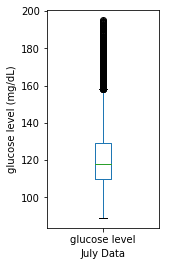

In [82]:
new_data['glucose level'].plot.box(figsize=(2,4)); plt.xlabel("July Data"); plt.ylabel("glucose level (mg/dL)")

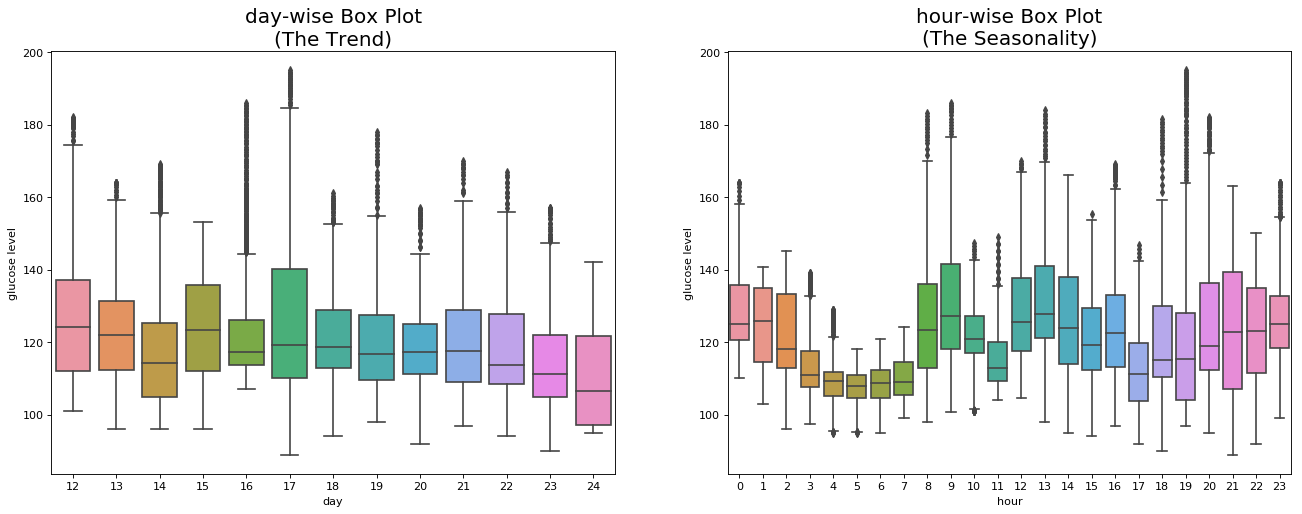

In [83]:
# boxplots after interpolation
new_data['glucose level'] = new_data['glucose level'].astype(float)
# new_dates = pd.to_datetime(data_int.keys())
# new_data['day'] = range(len(new_data))
# dates = pd.date_range(start='2020-07-12 7:00:00', end='2020-07-24 7:00:00').strftime("%Y-%m-%d") + " 07:00:00"
# dates = pd.to_datetime(dates)

# i == 0
# for d in new_dates:
#     diff = (d - dates[i]).total_seconds() / 3600
#     if diff <= 24.0:
#         new_data[d]['day'] = i
#     else:
#         i += 1
        
new_data['day'] = [d.day for d in new_dates]
new_data['hour'] = [d.hour for d in new_dates]

df = new_data
days = df['day'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(days), replace=False)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day', y='glucose level', data=df, ax=axes[0])
sns.boxplot(x='hour', y='glucose level', data=df,ax=axes[1])

# Set Title
axes[0].set_title('day-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

new_data = new_data.drop(columns = ["day", "hour"])

In [84]:
dates = pd.date_range(start='2020-07-12 7:00:00', end='2020-07-24 7:00:00').strftime("%Y-%m-%d")
dates = pd.to_datetime(dates) # dates
(dates[2] - dates[0]).total_seconds()/3600

48.0

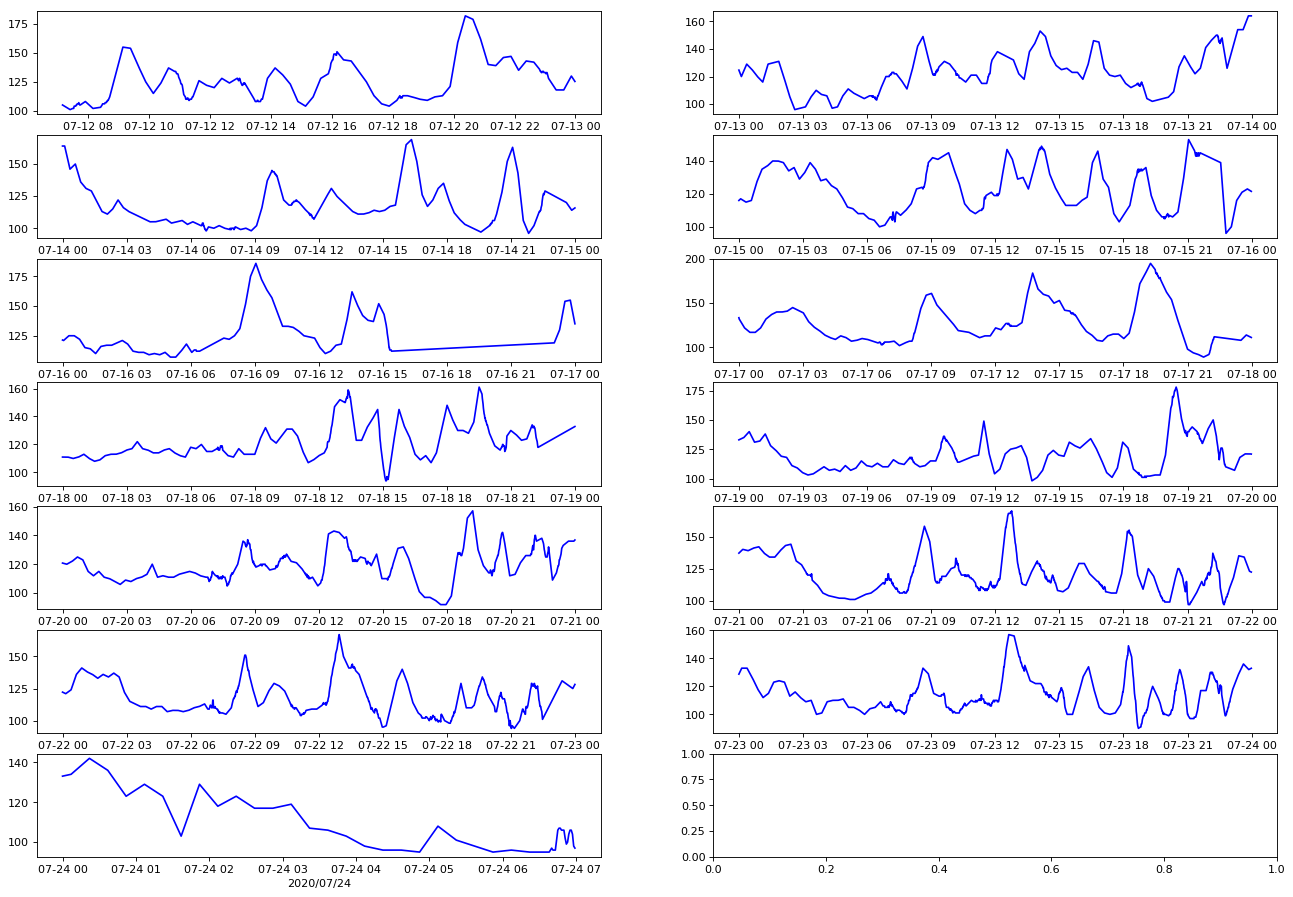

In [86]:
# daily plots
dates = pd.date_range(start='2020-07-12', end='2020-07-24').strftime("%Y/%m/%d")

fig, axs = plt.subplots(len(dates)//2+1, 2, figsize=(20, 14), dpi=80)

i=0
for j in range(0, len(dates), 2):
    new_data_daily = new_data.loc[dates[j]]
    axs[i, 0].plot(new_data_daily, color = "blue")
    axs[i, 0].set_xlabel(dates[j])
    if j+1 != len(dates):
        new_data_daily2 = new_data.loc[dates[j+1]]
        axs[i, 1].plot(new_data_daily2, color = "blue")
        axs[i, 1].set_xlabel(dates[j+1])
    i += 1
    
plt.show()

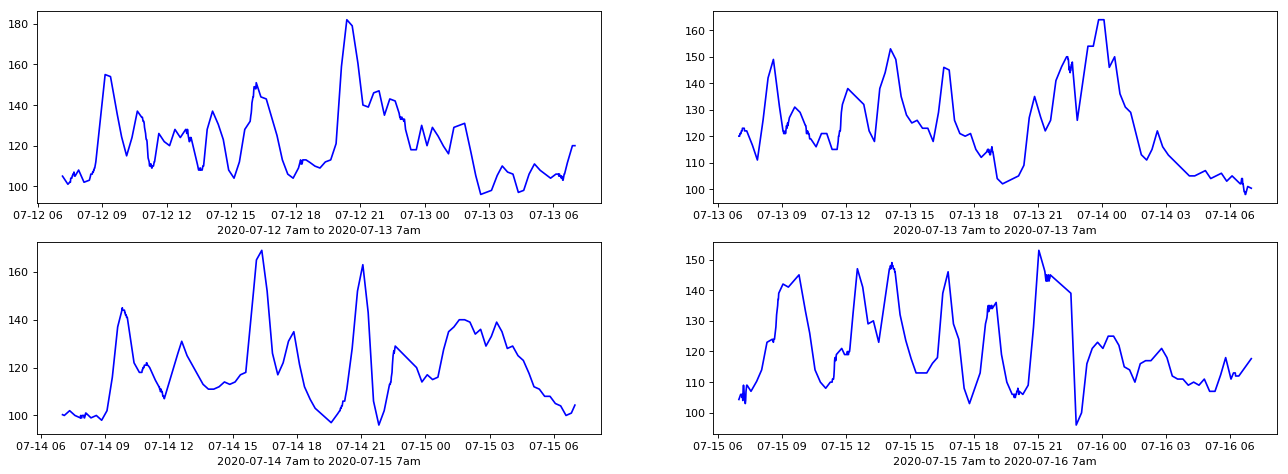

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(20,7), dpi= 80)

new_data_daily = new_data.loc["2020-07-12 07:00:00":"2020-07-13 07:00:00"]
axs[0,0].plot(new_data_daily, color = "blue")
axs[0,0].set_xlabel("2020-07-12 7am to 2020-07-13 7am")

new_data_daily = new_data.loc["2020-07-13 07:00:00":"2020-07-14 07:00:00"]
axs[0,1].plot(new_data_daily, color = "blue")
axs[0,1].set_xlabel("2020-07-13 7am to 2020-07-13 7am")

new_data_daily = new_data.loc["2020-07-14 07:00:00":"2020-07-15 07:00:00"]
axs[1,0].plot(new_data_daily, color = "blue")
axs[1,0].set_xlabel("2020-07-14 7am to 2020-07-15 7am")

new_data_daily = new_data.loc["2020-07-15 07:00:00":"2020-07-16 07:00:00"]
axs[1,1].plot(new_data_daily, color = "blue")
axs[1,1].set_xlabel("2020-07-15 7am to 2020-07-16 7am")
    
plt.show()

Text(0.5, 0, '2020-07-19 7am to 2020-07-20 7am')

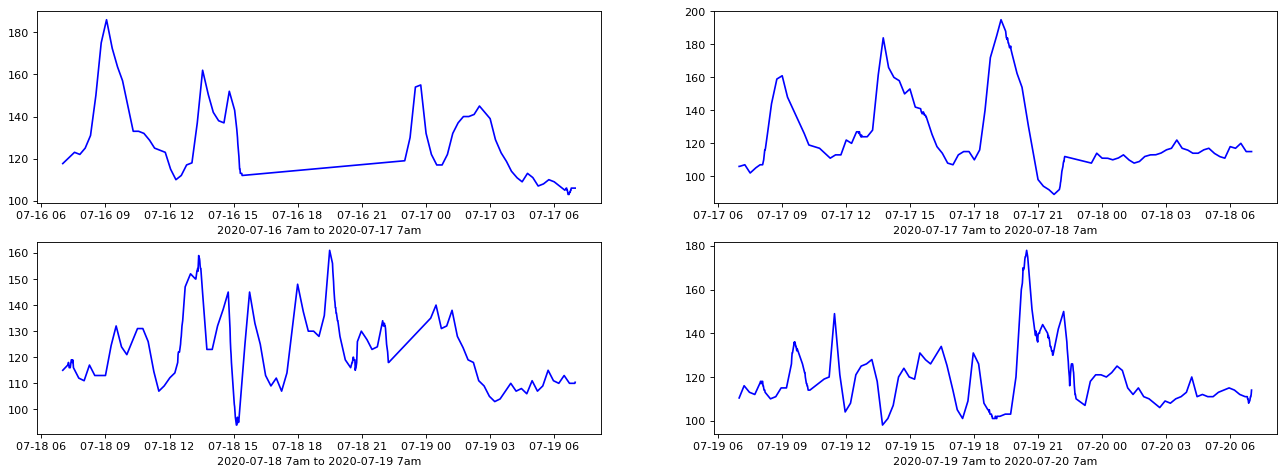

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(20,7), dpi= 80)

new_data_daily = new_data.loc["2020-07-16 07:00:00":"2020-07-17 07:00:00"]
axs[0,0].plot(new_data_daily, color = "blue")
axs[0,0].set_xlabel("2020-07-16 7am to 2020-07-17 7am")

new_data_daily = new_data.loc["2020-07-17 07:00:00":"2020-07-18 07:00:00"]
axs[0,1].plot(new_data_daily, color = "blue")
axs[0,1].set_xlabel("2020-07-17 7am to 2020-07-18 7am")

new_data_daily = new_data.loc["2020-07-18 07:00:00":"2020-07-19 07:00:00"]
axs[1,0].plot(new_data_daily, color = "blue")
axs[1,0].set_xlabel("2020-07-18 7am to 2020-07-19 7am")

new_data_daily = new_data.loc["2020-07-19 07:00:00":"2020-07-20 07:00:00"]
axs[1,1].plot(new_data_daily, color = "blue")
axs[1,1].set_xlabel("2020-07-19 7am to 2020-07-20 7am")

Text(0.5, 0, '2020-07-23 7am to 2020-07-24 7am')

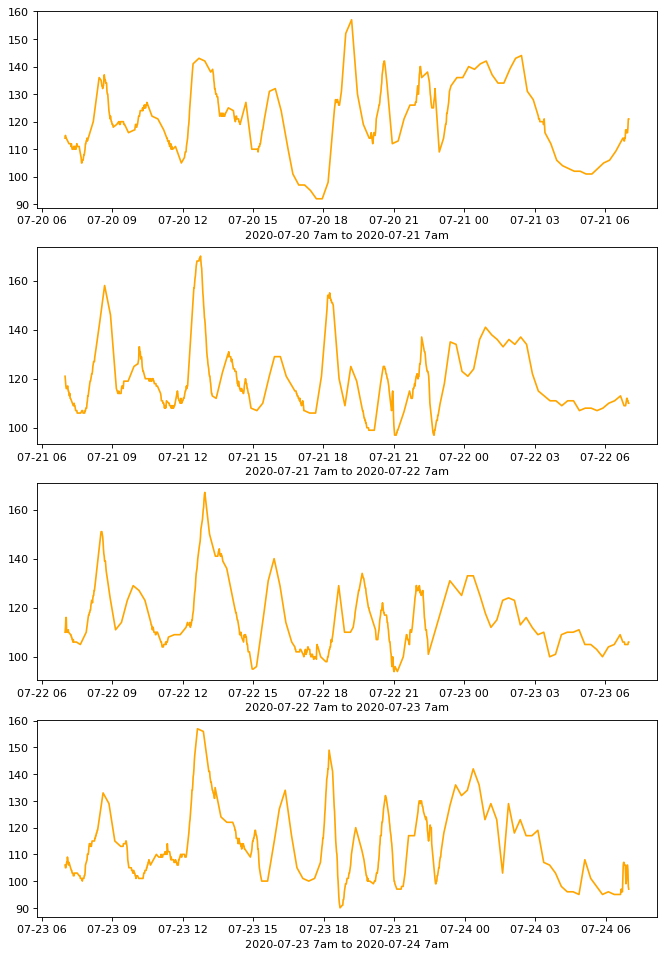

In [88]:
fig, axs = plt.subplots(4, 1, figsize=(10,15), dpi= 80)

new_data_daily = new_data.loc["2020-07-20 07:00:00":"2020-07-21 07:00:00"]
axs[0].plot(new_data_daily, color = "orange")
axs[0].set_xlabel("2020-07-20 7am to 2020-07-21 7am")

new_data_daily = new_data.loc["2020-07-21 07:00:00":"2020-07-22 07:00:00"]
axs[1].plot(new_data_daily, color = "orange")
axs[1].set_xlabel("2020-07-21 7am to 2020-07-22 7am")

new_data_daily = new_data.loc["2020-07-22 07:00:00":"2020-07-23 07:00:00"]
axs[2].plot(new_data_daily, color = "orange")
axs[2].set_xlabel("2020-07-22 7am to 2020-07-23 7am")

new_data_daily = new_data.loc["2020-07-23 07:00:00":"2020-07-24 07:00:00"]
axs[3].plot(new_data_daily, color = "orange")
axs[3].set_xlabel("2020-07-23 7am to 2020-07-24 7am")

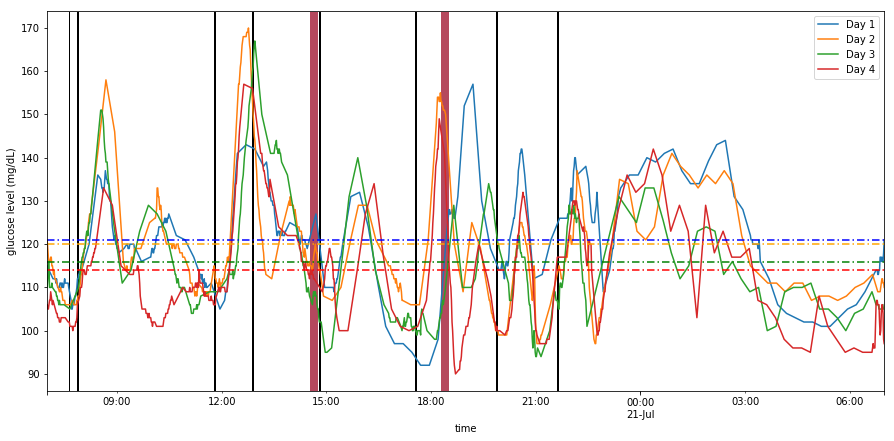

In [15]:
# overlap plots
from datetime import datetime, timedelta
from datetime import datetime, timedelta

new_data_daily1 = new_data.loc["2020-07-20 07:00:00": "2020-07-21 06:59:00"].drop(columns=["time"])
# new_data_daily1.index = new_data_daily1.index.time
new_data_daily2 = new_data.loc["2020-07-21 07:00:00": "2020-07-22 06:59:00"].drop(columns=["time"])
new_data_daily2.index = new_data_daily1.index
new_data_daily3 = new_data.loc["2020-07-22 07:00:00": "2020-07-23 06:59:00"].drop(columns=["time"])
new_data_daily3.index = new_data_daily1.index
new_data_daily4 = new_data.loc["2020-07-23 07:00:00": "2020-07-24 07:00:00"].drop(columns=["time"])
new_data_daily4.index = new_data_daily1.index

new_data_daily = pd.concat([new_data_daily1, new_data_daily2, new_data_daily3, 
                            new_data_daily4], axis=1, sort=False)

ax = new_data_daily.plot(figsize=(15, 7))
ax.set_ylabel("glucose level (mg/dL)")
# temp_dates = pd.date_range(start='07:00:00', end='06:59:00').strftime("%H:%M:%S"))
# temp_times = ["2020-07-20 07:00", "2020-07-20 08:00", "2020-07-20 09:00", "2020-07-20 10:00", "2020-07-20 11:00", 
#               "2020-07-20 12:00", "2020-07-20 13:00", "2020-07-20 14:00", "2020-07-20 15:00", "2020-07-20 16:00", 
#               "2020-07-20 17:00", "2020-07-20 18:00", "2020-07-20 19:00", "2020-07-20 20:00", "2020-07-20 21:00", 
#               "2020-07-20 22:00", "2020-07-20 23:00", "2020-07-21 00:00", "2020-07-21 01:00", "2020-07-21 02:00", 
#               "2020-07-21 03:00", "2020-07-21 04:00", "2020-07-21 05:00", "2020-07-21 06:00"]
# ax.set_xticks(temp_times)
# ax.set_xticklabels(temp_times, rotation=60)
# ax.set_xlim([pd.to_datetime("07:00:00").time, pd.to_datetime("06:59:00").time])
# ax.set_xlim(pd.to_datetime('2014-01-28 23:50:00'), pd.to_datetime('2014-01-29 00:10:00'))


# new_data_daily2 = new_data.loc["2020-07-21 07:00:00": "2020-07-22 07:00:00"].drop(columns=["time"])
# new_data_daily2.index = new_data_daily2.index.time
# new_data_daily2.plot(ax=ax, color="orange")
#     
# new_data_daily3 = new_data.loc["2020-07-22 07:00:00": "2020-07-23 07:00:00"].drop(columns=["time"])
# new_data_daily3.index = new_data_daily3.index.time
# new_data_daily3.plot(ax=ax, color="green")
# 
# new_data_daily4 = new_data.loc["2020-07-23 07:00:00":"2020-07-24 07:00:00"].drop(columns=["time"])
# new_data_daily4.index = new_data_daily4.index.time
# new_data_daily4.plot(ax=ax, color="red")

ax.legend(["Day 1", "Day 2", "Day 3", "Day 4"])

mean1 = new_data_daily1["glucose level"].mean()
ax.axhline(mean1, color="blue", dashes=(5, 2, 1, 2))
mean2 = new_data_daily2["glucose level"].mean()
ax.axhline(mean2, color="orange", dashes=(5, 2, 1, 2))
mean3 = new_data_daily3["glucose level"].mean()
ax.axhline(mean3, color="green", dashes=(5, 2, 1, 2))
mean4 = new_data_daily4["glucose level"].mean()
ax.axhline(mean4, color="red", dashes=(5, 2, 1, 2))

# Drinking/eating highlight
highlight_data = pd.DataFrame(columns=list('XY'))
highlight_data.columns = ['Start', 'Stop']
highlight_data['Start'] = ["2020-07-20 07:35:00", "2020-07-20 07:50:00", 
                           "2020-07-20 11:45:00", "2020-07-20 12:50:00", 
                           "2020-07-20 14:45:00", "2020-07-20 17:30:00", 
                           "2020-07-20 19:50:00", "2020-07-20 21:35:00"]
highlight_data['Stop'] = ["2020-07-20 07:40:00", "2020-07-20 07:55:00", 
                          "2020-07-20 11:50:00", "2020-07-20 12:55:00", 
                          "2020-07-20 14:50:00", "2020-07-20 17:35:00", 
                          "2020-07-20 19:55:00", "2020-07-20 21:40:00"]

for i, row in highlight_data.iterrows():
    ax.axvspan(row[0], row[1], edgecolor="white", facecolor="black")
    
# Exercises highlight
highlight_data_ex = pd.DataFrame(columns=list('XY'))
highlight_data_ex.columns = ['Start', 'Stop']
highlight_data_ex['Start'] = ["2020-07-20 14:30:00", "2020-07-20 18:15:00"]
highlight_data_ex['Stop'] = ["2020-07-20 14:45:00", "2020-07-20 18:30:00"]

np.random.seed(76)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(highlight_data_ex), replace=False)

for i, row in highlight_data_ex.iterrows():
    ax.axvspan(row[0], row[1], edgecolor="white", facecolor=mycolors[0])

plt.show()


In [17]:
new_data_daily.to_excel("four_days_interpolated.xlsx")

In [ ]:
# mean curve
avg = (new_data_daily1 + new_data_daily2 + new_data_daily3 + new_data_daily4)/4
avg_plot = avg.plot(figsize=(15, 7), color="blue")
avg_plot.set_ylabel("glucose level (mg/dL)")

# Drinking/eating highlight
highlight_data = pd.DataFrame(columns=list('XY'))
highlight_data.columns = ['Start', 'Stop']
highlight_data['Start'] = ["07:35:00", "07:50:00", "11:45:00", "12:50:00", 
                           "14:45:00", "17:30:00", "19:50:00", "21:35:00"]
highlight_data['Stop'] = ["07:40:00", "07:55:00", "11:50:00", "12:55:00", 
                          "14:50:00", "17:35:00", "19:55:00", "21:40:00"]
for i, row in highlight_data.iterrows():
    avg_plot.axvspan(row[0], row[1], edgecolor="white", facecolor="orange", label='_nolegend_')
    
# Exercises highlight
highlight_data_ex = pd.DataFrame(columns=list('XY'))
highlight_data_ex.columns = ['Start', 'Stop']
highlight_data_ex['Start'] = ["14:30:00", "18:15:00"]
highlight_data_ex['Stop'] = ["14:45:00", "18:30:00"]
for i, row in highlight_data_ex.iterrows():
    avg_plot.axvspan(row[0], row[1], edgecolor="white", facecolor=mycolors[0], 
                     label='_nolegend_')

# set up plot labels
temp_times = ["07:00", "08:00", "09:00", "10:00", "11:00", 
              "12:00", "13:00", "14:00", "15:00", "16:00", 
              "17:00", "18:00", "19:00", "20:00", "21:00", 
              "22:00", "23:00", "00:00", "01:00", "02:00", 
              "03:00", "04:00", "05:00", "06:00"]
avg_plot.set_xticks(temp_times)
avg_plot.set_xticklabels(temp_times)
avg_plot.legend(["Average value of 4 days data", "Eat/Drink", "Exercise"])

plt.show()



In [ ]:
# from ggplot import ggplot
# 
# df= pd.concat([new_data_daily1, new_data_daily2, new_data_daily3, new_data_daily4])
# names(df)=c("step",paste("ser",c(len(df)),sep=""))
# dfm=melt(df, id.vars = 1)
# 
# qs = data.frame(
#    do.call(
#        rbind,
#        tapply(
#          dfm$value, dfm$step, function(i){quantile(i)})),
#    t=1:100)


NameError: name 'dfm' is not defined

In [86]:
# dfm


NameError: name 'dfm' is not defined

In [57]:
# from datetime import datetime, timedelta
# from datetime import datetime, timedelta
# 
# def datetime_range(start, end, delta):
#     current = start
#     while current < end:
#         yield current
#         current += delta
#         
# dts = [dt.strftime('%Y-%m-%d %H:%M:%S') for dt in 
#        datetime_range(datetime(2020, 7, 20, 7, 0, 0), datetime(2020, 7, 21, 7, 0, 0), 
#        timedelta(minutes=1))]
# temp_dates

In [ ]:
# 4 days boxplots
new_data_daily1 = new_data.loc["2020-07-20 07:00:00" : "2020-07-21 07:00:00"].drop(columns=["time"])
new_data_daily1['day'] = [1 for _ in range(len(new_data_daily1))]
new_data_daily2 = new_data.loc["2020-07-21 07:00:00" : "2020-07-22 07:00:00"].drop(columns=["time"])
new_data_daily2['day'] = [2 for _ in range(len(new_data_daily2))]
new_data_daily3 = new_data.loc["2020-07-22 07:00:00" : "2020-07-23 07:00:00"].drop(columns=["time"])
new_data_daily3['day'] = [3 for _ in range(len(new_data_daily3))]
new_data_daily4 = new_data.loc["2020-07-23 07:00:00" : "2020-07-24 07:00:00"].drop(columns=["time"])
new_data_daily4['day'] = [4 for _ in range(len(new_data_daily4))]

frames = [new_data_daily1, new_data_daily2, new_data_daily3, new_data_daily4]
four_days = pd.concat(frames)

new_dates = pd.to_datetime(four_days.index)
four_days['hour'] = [d.hour for d in new_dates]

df = new_data["2020-07-20 07:00:00":"2020-07-24 07:00:00"]
# days = df['day'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(days), replace=False)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='day', y='glucose level', data=four_days, ax=axes[0])
sns.boxplot(x='hour', y='glucose level', data=four_days, ax=axes[1])

# Set Title
axes[0].set_title('day-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('hour-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# new_data = new_data.drop(columns = ["day", "hour"]

In [ ]:
four_days

In [ ]:
four_days = new_data.loc["2020-07-20 07:00:00":"2020-07-24 07:00:00"]

In [ ]:
four_days["glucose level"].plot.box(figsize=(2,4)); plt.xlabel("3 days"); plt.ylabel("glucose level (mg/dL)")

In [ ]:
four_days['glucose level'].mean()

In [ ]:
four_days['glucose level'].var()

In [ ]:
four_days['glucose level'].std() / four_days['glucose level'].mean()

In [ ]:
# 4 days overall plot
new_data_daily1 = new_data.loc["2020-07-20 07:00:00":"2020-07-21 07:00:00"].drop(columns = ["time"])
ax = new_data_daily1.plot(figsize=(15,7), color="blue")
ax.set_ylabel("glucose level (mg/dL)")

new_data_daily2 = new_data.loc["2020-07-21 07:00:00": "2020-07-22 07:00:00"].drop(columns = ["time"])
new_data_daily2.plot(ax=ax, color="orange")
    
new_data_daily3 = new_data.loc["2020-07-22 07:00:00": "2020-07-23 07:00:00"].drop(columns = ["time"])
new_data_daily3.plot(ax=ax, color = "green")

new_data_daily3 = new_data.loc["2020-07-23 07:00:00": "2020-07-24 07:00:00"].drop(columns = ["time"])
new_data_daily3.plot(ax=ax, color = "red")


ax.legend(["Day 1", "Day 2", "Day 3", "Day 4"])

In [ ]:
# rolling window
new_data.rolling(1440).mean().plot()
new_data.rolling(2880).mean().plot()
new_data.rolling(1440).sum().plot()

In [ ]:
data_int.shape

In [ ]:
data.shape

In [ ]:
tsaplots.plot_acf(data_int, lags=1440)
plt.show()

In [ ]:
# Simple example for fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [ ]:
data_int.plot()

In [ ]:
# Fourier Transf
N = data_int.shape[0]
T = 1.0/1.0
yf = fft(data_int)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# Frequency plot
plt.ylim(-0.5, 4)
plt.xlim(0, 0.01)
plt.plot(xf,2.0/N * np.abs(yf[0:N//2]))

In [ ]:
# # Fourier Transf before interpolation
# N2 = data.shape[0]
# T = 1.0/1.0
# yf2 = fft(data_int)
# xf = np.linspace(0.0, 1.0/(2.0*T), N2//2)
# # Frequency plot
# plt.ylim(-0.1, 20)
# plt.xlim(-0.01, 0.5)
# plt.plot(xf,2.0/N * np.abs(yf2[0:N2//2]))

In [ ]:
# inverse fft
xf_new = np.linspace(0.0, 1.0/(2.0*T), N)
s = ifft(yf)
print(xf.shape); print(yf.shape); print(s.real.shape); print(s.imag.shape)
plt.plot(xf_new, s.real, 'b-', xf_new, s.imag, 'r--'); plt.title("Inverted back data")
plt.legend(('real', 'imaginary'))
plt.ylim(70, 200)
plt.show()

# data_int.plot(); plt.title("Original data")

In [ ]:
# device noise
# stable period
def stable_period(data, diff: float):
    """Return a tuple of indices where the data varies in between diff """
    dic = {}
    for i in range(len(data)-1):
        if abs(data['glucose level'][i] - data['glucose level'][i+1]) < diff:
            if i-1 >= 0 & i-1 in dic:
                dic[i-1] = dict[i-1].append(i+1)
            elif i-1 >= 0:
                dic[i-1] = [i+1]
    return dic

# stable_period(gap_data, 1)

In [ ]:
# temp_data = new_data.subtract(data, fill_value=0)
# df2.set_index('City').subtract(df1.set_index('City'), fill_value=0)
data_d = pd.read_csv('Data_July_raw.csv')
# data_d.time = pd.to_datetime(data.time, format = "%d/%m/%Y %H.%M.%S")
data_d = data.drop(data.index[[0,1]])
intersected_df = pd.merge(data_d, data_int, how='time')
print(intersected_df)

In [10]:
# data1['glucose level'].mean()

In [ ]:
# temp_data

In [ ]:
# data["time"]